# Pivot Tables


In [609]:
import numpy as np
import seaborn as sns
import pandas as pd

In [610]:
df = pd.read_csv('data/vehicles.csv')

In [611]:
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


# Pivot Table

## Index

> The index columns are the columns we are going to **group by**. Also called the `context` or the `factor`

In [613]:
df.pivot_table(index=["Cylinders"])

,CO2 Emission Grams/Mile,City MPG,Combined MPG,Engine Displacement,Fuel Barrels/Year,Fuel Cost/Year,Highway MPG,Year
Cylinders,,,,,,,,
2.0,471.734739,17.000000,19.104167,1.239583,17.503468,2004.166667,22.937500,1997.062500
3.0,246.695246,34.009950,36.572139,1.052239,9.160623,962.437811,40.323383,1996.388060
4.0,380.939902,21.560323,24.075441,2.066570,14.120702,1487.879798,28.272417,1999.780643
5.0,444.828844,17.785615,20.334716,2.636653,16.514187,1813.278008,24.686030,2002.641770
6.0,487.609906,16.328946,18.606189,3.439342,18.086572,1943.196240,22.661261,2001.294242
8.0,604.159066,13.323331,15.206302,5.222581,22.325400,2414.734934,18.537134,2000.778320
10.0,652.086493,11.653595,13.941176,5.911765,24.182393,2926.797386,18.366013,2008.777778
12.0,696.034399,10.893238,13.014235,5.907473,25.831975,3143.149466,16.969751,2006.218861
16.0,873.062500,8.000000,10.000000,8.000000,32.961000,4050.000000,14.625000,2011.125000


## Columns

> The columns argument is used to determine the columns for which we would like to **compute a summary statistic** for <u>`every value`</u>.

In [577]:
df.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


In [578]:
df.pivot_table(index=["Cylinders"], columns=['Fuel Type'])

CO2 Emission Grams/Mile                              \
Fuel Type                     CNG      Diesel Gasoline or E85   
Cylinders                                                       
2.0                           NaN         NaN             NaN   
3.0                           NaN         NaN             NaN   
4.0                    257.539637  330.909525      359.073842   
5.0                           NaN  425.288362             NaN   
6.0                    417.030882  435.797518      454.282739   
8.0                    573.309895  589.949213      594.649022   
10.0                          NaN  590.506536             NaN   
12.0                          NaN         NaN             NaN   
16.0                          NaN         NaN             NaN   

                                                                               \
Fuel Type Gasoline or natural gas Gasoline or propane    Midgrade     Premium   
Cylinders                                                                       
2.0                           NaN                 NaN         NaN  486.635300   
3.0                           NaN                 NaN         NaN  253.485043   
4.0                    383.464097                 NaN         NaN  389.573558   
5.0                           NaN                 NaN         NaN  436.029637   
6.0                    437.000000                 NaN  406.800000  454.941429   
8.0                    768.310391             666.525  524.891046  560.324585   
10.0                          NaN                 NaN         NaN  646.760443   
12.0                          NaN                 NaN         NaN  698.033195   
16.0                          NaN                 NaN         NaN  873.062500   

                                                                             \
Fuel Type Premium Gas or Electricity Premium and Electricity Premium or E85   
Cylinders                                                                     
2.0                        39.000000                     NaN            NaN   
3.0                              NaN              198.000000            NaN   
4.0                        96.000000              206.333333     368.142857   
5.0                              NaN                     NaN            NaN   
6.0                       259.333333              235.333333     423.276621   
8.0                       277.000000              463.000000     524.687500   
10.0                             NaN                     NaN            NaN   
12.0                             NaN                     NaN     624.215035   
16.0                             NaN                     NaN            NaN   

           ...                    Year                                   \
Fuel Type  ... Gasoline or natural gas Gasoline or propane     Midgrade   
Cylinders  ...                                                            
2.0        ...                     NaN                 NaN          NaN   
3.0        ...                     NaN                 NaN          NaN   
4.0        ...                  2002.0                 NaN          NaN   
5.0        ...                     NaN                 NaN          NaN   
6.0        ...                  2015.5                 NaN  2016.400000   
8.0        ...                  2003.0              2002.5  2013.985507   
10.0       ...                     NaN                 NaN          NaN   
12.0       ...                     NaN                 NaN          NaN   
16.0       ...                     NaN                 NaN          NaN   

                                                                           \
Fuel Type      Premium Premium Gas or Electricity Premium and Electricity   
Cylinders                                                                   
2.0        2003.818182                     2015.0                     NaN   
3.0        2013.000000                        NaN             2015.000000   
4.0        2004.51931

## Values
> Values allow us to specify the columns that are aggregated.

In [579]:
df.pivot_table(index=["Cylinders"], columns=['Fuel Type'], values=['City MPG'])

City MPG                                                     \
Fuel Type        CNG     Diesel Gasoline or E85 Gasoline or natural gas   
Cylinders                                                                 
2.0              NaN        NaN             NaN                     NaN   
3.0              NaN        NaN             NaN                     NaN   
4.0        24.380952  28.477987       21.566929               20.400000   
5.0              NaN  22.470588             NaN                     NaN   
6.0        15.000000  20.827815       17.105850               17.000000   
8.0        11.138889  15.786223       13.342736               10.615385   
10.0             NaN  15.000000             NaN                     NaN   
12.0             NaN        NaN             NaN                     NaN   
16.0             NaN        NaN             NaN                     NaN   

                                                     \
Fuel Type Gasoline or propane   Midgrade    Premium   
Cylinders                                             
2.0                       NaN        NaN  15.818182   
3.0                       NaN        NaN  32.192308   
4.0                       NaN        NaN  20.544500   
5.0                       NaN        NaN  17.697987   
6.0                       NaN  19.000000  17.184810   
8.0                      12.0  14.550725  13.954423   
10.0                      NaN        NaN  11.652482   
12.0                      NaN        NaN  10.879208   
16.0                      NaN        NaN   8.000000   

                                                                             \
Fuel Type Premium Gas or Electricity Premium and Electricity Premium or E85   
Cylinders                                                                     
2.0                             41.0                     NaN            NaN   
3.0                              NaN               28.000000            NaN   
4.0                             31.6               27.222222      21.142857   
5.0                              NaN                     NaN            NaN   
6.0                             21.0               22.833333      18.345455   
8.0                             20.0               16.000000      14.687500   
10.0                             NaN                     NaN            NaN   
12.0                             NaN                     NaN      11.727273   
16.0                             NaN                     NaN            NaN   

                                                                             
Fuel Type    Regular Regular Gas and Electricity Regular Gas or Electricity  
Cylinders                                                                    
2.0        15.000000                         NaN                        NaN  
3.0        34.389535                         NaN                        NaN  
4.0        21.526097                      43.125                       43.0  
5.0        17.654412                         NaN                        NaN  
6.0        15.780586                         NaN                        NaN  
8.0        12.675375                         NaN                        NaN  
10.0       10.000000                         NaN                        NaN  
12.0       10.571429                         NaN                        NaN  
16.0             NaN                         NaN                        NaN

## Aggregation Function
> The default aggregation function is the mean.

In [624]:
pd.options.display.max_rows = 105

In [635]:
df.pivot_table(index=["Cylinders"], columns=['Fuel Type'], values=['City MPG'], aggfunc='count', ).T

Cylinders                             2.0    3.0      4.0    5.0     6.0   \
         Fuel Type                                                          
City MPG CNG                           NaN    NaN     21.0    NaN     3.0   
         Diesel                        NaN    NaN    318.0   17.0   151.0   
         Gasoline or E85               NaN    NaN    127.0    NaN   359.0   
         Gasoline or natural gas       NaN    NaN      5.0    NaN     2.0   
         Gasoline or propane           NaN    NaN      NaN    NaN     NaN   
         Midgrade                      NaN    NaN      NaN    NaN     5.0   
         Premium                      22.0   26.0   2382.0  298.0  3950.0   
         Premium Gas or Electricity    3.0    NaN     10.0    NaN     3.0   
         Premium and Electricity       NaN    3.0      9.0    NaN     6.0   
         Premium or E85                NaN    NaN     28.0    NaN    55.0   
         Regular                      23.0  172.0  10576.0  408.0  8231.0   
         Regular Gas and Electricity   NaN    NaN     16.0    NaN     NaN   
         Regular Gas or Electricity    NaN    NaN      2.0    NaN     NaN   

Cylinders                               8.0    10.0   12.0  16.0  
         Fuel Type                                                
City MPG CNG                            36.0    NaN    NaN   NaN  
         Diesel                        421.0    4.0    NaN   NaN  
         Gasoline or E85               709.0    NaN    NaN   NaN  
         Gasoline or natural gas        13.0    NaN    NaN   NaN  
         Gasoline or propane             8.0    NaN    NaN   NaN  
         Midgrade                       69.0    NaN    NaN   NaN  
         Premium                      2589.0  141.0  505.0   8.0  
         Premium Gas or Electricity      1.0    NaN    NaN   NaN  
         Premium and Electricity         2.0    NaN    NaN   NaN  
         Premium or E85                 16.0    NaN   22.0   NaN  
         Regular                      4134.0    8.0   35.0   NaN  
         Regular Gas and Electricity     NaN    NaN    NaN   NaN  
         Regular Gas or Electricity      NaN    NaN    NaN   NaN

In [645]:
df.pivot_table(index=["Cylinders"], columns=['Fuel Type'], values=['City MPG'], aggfunc='count', ).T.style.background_gradient(cmap='Greens', axis=1)

c:\programas\anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [634]:
df.pivot_table(index=["Cylinders"], columns=['Fuel Type'], values=['City MPG'], aggfunc='describe', ).T # fill_value=0

Cylinders                                        2.0         3.0   \
               Fuel Type                                            
City MPG 25%   CNG                                NaN         NaN   
               Diesel                             NaN         NaN   
               Gasoline or E85                    NaN         NaN   
               Gasoline or natural gas            NaN         NaN   
               Gasoline or propane                NaN         NaN   
               Midgrade                           NaN         NaN   
               Premium                      16.000000   31.250000   
               Premium Gas or Electricity   41.000000         NaN   
               Premium and Electricity            NaN   28.000000   
               Premium or E85                     NaN         NaN   
               Regular                      15.000000   31.000000   
               Regular Gas and Electricity        NaN         NaN   
               Regular Gas or Electricity         NaN         NaN   
         50%   CNG                                NaN         NaN   
               Diesel                             NaN         NaN   
               Gasoline or E85                    NaN         NaN   
               Gasoline or natural gas            NaN         NaN   
               Gasoline or propane                NaN         NaN   
               Midgrade                           NaN         NaN   
               Premium                      16.000000   33.000000   
               Premium Gas or Electricity   41.000000         NaN   
               Premium and Electricity            NaN   28.000000   
               Premium or E85                     NaN         NaN   
               Regular                      15.000000   33.000000   
               Regular Gas and Electricity        NaN         NaN   
               Regular Gas or Electricity         NaN         NaN   
         75%   CNG                                NaN         NaN   
               Diesel                             NaN         NaN   
               Gasoline or E85                    NaN         NaN   
               Gasoline or natural gas            NaN         NaN   
               Gasoline or propane                NaN         NaN   
               Midgrade                           NaN         NaN   
               Premium                      16.000000   34.000000   
               Premium Gas or Electricity   41.000000         NaN   
               Premium and Electricity            NaN   28.000000   
               Premium or E85                     NaN         NaN   
               Regular                      15.000000   38.000000   
               Regular Gas and Electricity        NaN         NaN   
               Regular Gas or Electricity         NaN         NaN   
         count CNG                                NaN         NaN   
               Diesel                             NaN         NaN   
               Gasoline or E85                    NaN         NaN   
               Gasoline or natural gas            NaN         NaN   
               Gasoline or propane                NaN         NaN   
               Midgrade                           NaN         NaN   
               Premium                      22.000000   26.000000   
               Premium Gas or Electricity    3.000000         NaN   
               Premium and Electricity            NaN    3.000000   
               Premium or E85                     NaN         NaN   
               Regular                      23.000000  172.000000   
               Regular Gas and Electricity        NaN         NaN   
               Regular Gas or Electricity         NaN         NaN   
         max   CNG                                NaN         NaN   
               Diesel                             NaN         NaN   
               Gasoline or E85                    NaN         NaN   
               Gasoline or natural gas            NaN         NaN  

## Fill Value

In [646]:
df.pivot_table(index=["Cylinders"], columns=['Fuel Type'], values=['City MPG'], aggfunc='count', fill_value=0 ) 

City MPG                                                 \
Fuel Type      CNG Diesel Gasoline or E85 Gasoline or natural gas   
Cylinders                                                           
2.0              0      0               0                       0   
3.0              0      0               0                       0   
4.0             21    318             127                       5   
5.0              0     17               0                       0   
6.0              3    151             359                       2   
8.0             36    421             709                      13   
10.0             0      4               0                       0   
12.0             0      0               0                       0   
16.0             0      0               0                       0   

                                                                           \
Fuel Type Gasoline or propane Midgrade Premium Premium Gas or Electricity   
Cylinders                                                                   
2.0                         0        0      22                          3   
3.0                         0        0      26                          0   
4.0                         0        0    2382                         10   
5.0                         0        0     298                          0   
6.0                         0        5    3950                          3   
8.0                         8       69    2589                          1   
10.0                        0        0     141                          0   
12.0                        0        0     505                          0   
16.0                        0        0       8                          0   

                                                          \
Fuel Type Premium and Electricity Premium or E85 Regular   
Cylinders                                                  
2.0                             0              0      23   
3.0                             3              0     172   
4.0                             9             28   10576   
5.0                             0              0     408   
6.0                             6             55    8231   
8.0                             2             16    4134   
10.0                            0              0       8   
12.0                            0             22      35   
16.0                            0              0       0   

                                                                  
Fuel Type Regular Gas and Electricity Regular Gas or Electricity  
Cylinders                                                         
2.0                                 0                          0  
3.0                                 0                          0  
4.0                                16                          2  
5.0                                 0                          0  
6.0                                 0                          0  
8.0                                 0                          0  
10.0                                0                          0  
12.0                                0                          0  
16.0                                0                          0

# Itau Example

In [647]:
import pandas as pd

In [650]:
df = pd.read_csv('data/ratings.csv')
df

,CNPJ,SOCIO,SCORE_CNPJ,SCORE_PARTNERS,BHV,BHV_SOCIO,PD_DEFAULT
0,6843607,9624021,0.001026,0.684438,A,F,0
1,2599148,1165186,0.001217,0.491714,A,D,0
2,2204327,8426093,0.002098,0.446319,A,D,0
3,441309,5352603,0.076389,0.304247,A,C,0
4,5932472,8210979,1.000000,0.548385,F,D,1
...,...,...,...,...,...,...,...
99995,8486998,4216199,1.000000,0.599050,F,D,1
99996,8227446,2435675,0.803210,0.306293,F,C,1
99997,5863313,5836572,0.000007,0.450723,A,D,1
99998,2226987,1640415,0.003826,0.608427,A,F,0


## Pivot Table

In [655]:
df.pivot_table(index='BHV', columns='BHV_SOCIO', values='PD_DEFAULT')

BHV_SOCIO,A,B,C,D,F
BHV,,,,,
A,0.151316,0.153745,0.148060,0.148660,0.148359
B,0.200000,0.142857,0.141722,0.155808,0.197253
C,0.111111,0.160194,0.151163,0.157171,0.511905
D,0.222222,0.138554,0.157667,0.533389,1.000000
F,0.565217,0.786842,0.915262,1.000000,1.000000


## Heatmap

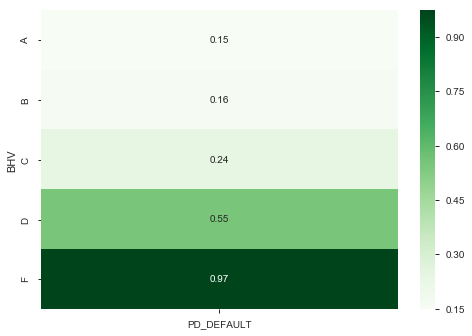

In [659]:
sns.heatmap(df.pivot_table(index='BHV', values='PD_DEFAULT'), 
            annot=True, 
            cmap='Greens')

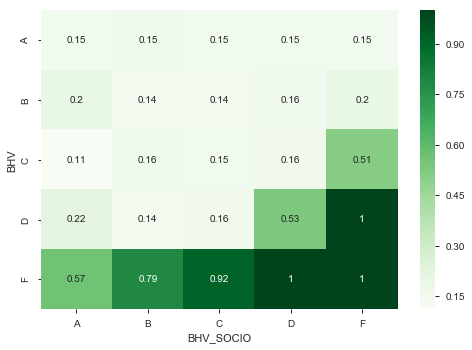

In [658]:
sns.heatmap(df.pivot_table(index='BHV', columns='BHV_SOCIO', values='PD_DEFAULT'), 
            annot=True, 
            cmap='Greens')

## Crosstab

In [662]:
# 
pd.crosstab(df.BHV, df.BHV_SOCIO, values=df.PD_DEFAULT, aggfunc='mean', )

BHV_SOCIO,A,B,C,D,F
BHV,,,,,
A,0.151316,0.153745,0.148060,0.148660,0.148359
B,0.200000,0.142857,0.141722,0.155808,0.197253
C,0.111111,0.160194,0.151163,0.157171,0.511905
D,0.222222,0.138554,0.157667,0.533389,1.000000
F,0.565217,0.786842,0.915262,1.000000,1.000000


### Normalize argument

In [672]:
pd.crosstab(df.BHV, df.BHV_SOCIO, values=df.PD_DEFAULT, aggfunc='mean', normalize=True)

BHV_SOCIO,A,B,C,D,F
BHV,,,,,
A,0.016816,0.017086,0.016454,0.016521,0.016487
B,0.022226,0.015876,0.015750,0.017315,0.021921
C,0.012348,0.017802,0.016799,0.017466,0.056888
D,0.024696,0.015398,0.017522,0.059276,0.111130
F,0.062813,0.087442,0.101713,0.111130,0.111130


In [ ]:
#normalize=True
#normalize='index'
#normalize='columns'

# Pivot Table Js

In [ ]:
!pip install pivottablejs

In [673]:
from pivottablejs import pivot_ui

array([0, 1, 1, ..., 0, 1, 1])

In [678]:
df['CLIENTE_ANTIGO'] = np.random.choice([0, 1], size=df.shape[0], p=[0.2, 0.8])

In [680]:
pivot_ui(df)

# Pandas Profiling

https://github.com/pandas-profiling/pandas-profiling

In [ ]:
!pip install pandas-profiling

In [683]:
import pandas as pd
from pandas_profiling import ProfileReport
df = pd.read_csv('data/vehicles.csv')
profile = ProfileReport(df, title='The Vehicles Dataset')


In [684]:
profile

In [685]:
## Storing report
profile.to_file(output_file="output.html")